# Sign Language Detection Using Action Recognition

Using Nicholas Renotte's [Sign Language Detection using ACTION RECOGNITION with Python | LSTM Deep Learning Model](https://youtu.be/doDUihpj6ro) tutorial

[NR's code on GitHub](https://github.com/nicknochnack/ActionDetectionforSignLanguage)

## Goal: Real-time sign language detection using sequences

1. Estract holistic keypoints
2. Train an LSTM DL model
3. Make real-time predictions using sesquences

We will use:
* __media-pipe holistic__ to extract __keypoints__ from hand, body, face
* __TensorFlow__ and __Keras__ to build up a __long short-term memory deep learning model__ (__LSTM DL__) for predictions

## How it works

1. collect keypoints from mediapipe holistic
2. train a deep neural network with LSTM layers for sequences
3. perform real-time sign language detection using OpenCV

## 1. Install and import dependencies

In [ ]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib
# not installing tensorflow-gpu since I'm not using GPU

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 2. Find and view keypoints using MediaPipe (MP) holistic

We will be using the mediapipe package to create the following variables:

* __mp_holistic__ will be used to make our detections
* __mp_drawing__ will be used to draw our detections

In [2]:
mp_holistic = mp.solutions.holistic # holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utilities

In [3]:
# mediapipe_detection(image, model) will find the mediapipe landmarks for an image
# image: the image from the feed we will be scrutinizing
# model: the MP detection model
def mediapipe_detection(image, model):
    # convert color from BGR (cv) to RGB (for mp detection)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # make image unwriteable to save memory
    image.flags.writeable = False
    # make prediction using the MP detection model
    results = model.process(image)
    # make image writeable again
    image.flags.writeable = True
    # convert image back to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [ ]:
# FYI: for information on the cv2.cvtColor() function
cv2.cvtColor??

In [4]:
# draw_landmarks(image, results) will draw the landmark points over the live image
# image: the image from the feed we will be drawing on top of
# results: the landmark list we found with mediapipe_detection()
def draw_landmarks(image, results):
    # draw face landmarks & connections
    # no longer use FACE_CONNECTIONS.  Rather, use FACEMESH_TESSELATION
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    # draw pose landmarks & connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    # draw left hand landmarks & connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # draw right hand landmarks & connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    

In [ ]:
# FYI: media pipe's documentation on mp_drawing.draw_landmarks
# (mp.solutions.drawing_utils.draw_landmarks)
mp_drawing.draw_landmarks??

In [5]:
# shows what landmark is connected to what landmark
# nose = 0, 1 = inner left eye, 4 = inner right eye, 2 = left eye, 3 = outer left eye
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [6]:
cap = cv2.VideoCapture(2) # 2 is for logitech (near right USB-C port)
# set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        #read feed
        ret, frame = cap.read()
        #make detection
        image, results = mediapipe_detection(frame, holistic)
        #draw landmarks and connections
        draw_landmarks(image, results)
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        #break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    # end the video capture setting
    cap.release()
    cv2.waitKey(1)
    # close the video capture window(s)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [7]:
#this will show the number of landmark points of the left hand in the ending frame.
len(results.face_landmarks.landmark)

468

In [8]:
draw_landmarks(frame, results)

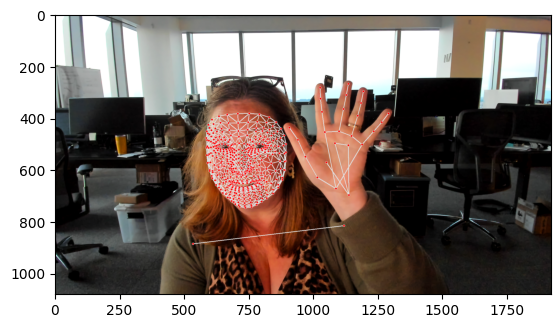

In [9]:
# plot the last frame from the frame array
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
results.face_landmarks

landmark {
  x: 0.37643516063690186
  y: 0.597207248210907
  z: -0.012867789715528488
}
landmark {
  x: 0.3702925145626068
  y: 0.5648566484451294
  z: -0.034121379256248474
}
landmark {
  x: 0.37386733293533325
  y: 0.5743237137794495
  z: -0.016535844653844833
}
landmark {
  x: 0.3644409775733948
  y: 0.5184217691421509
  z: -0.02792302519083023
}
landmark {
  x: 0.3694314658641815
  y: 0.5513030290603638
  z: -0.037242591381073
}
landmark {
  x: 0.3692866563796997
  y: 0.532285749912262
  z: -0.035957880318164825
}
landmark {
  x: 0.3703036606311798
  y: 0.48473235964775085
  z: -0.021847505122423172
}
landmark {
  x: 0.3263552486896515
  y: 0.47700417041778564
  z: 0.00962180644273758
}
landmark {
  x: 0.36986207962036133
  y: 0.43873047828674316
  z: -0.01901792548596859
}
landmark {
  x: 0.3691200315952301
  y: 0.417732834815979
  z: -0.021556800231337547
}
landmark {
  x: 0.3680872321128845
  y: 0.3561447262763977
  z: -0.022183621302247047
}
landmark {
  x: 0.3771028518676758
 

In [11]:
frame[:2]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 95,  91,  94],
        [ 96,  93,  95],
        [ 97,  94,  96]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 96,  92,  96],
        [ 97,  94,  97],
        [ 97,  94,  97]]], dtype=uint8)

In [12]:
# data points for image detection vs landmark detection
print('one frame... ', 'image:', len(frame) * len(frame[0]) * 16 * 2, 'landmark:', 468 * 3 * 16 * 2)
print('two seconds @ 15fps... ', 'image:', len(frame) * len(frame[0]) * 16 * 2, 'landmark:', 468 * 3 * 16 * 2)

one frame...  image: 66355200 landmark: 44928
two seconds @ 15fps...  image: 66355200 landmark: 44928


## 3. Extract keypoint values

### input data

The input data used for this action detection model is a series of __30 arrays__.  __Each__ array contains __1662 values__ (30, 1662).

__Each__ array represents a __single frame__'s the landmark values (1662 values).

We will be using __30 frames of action__ to train and test on.

Typical landmarks will look like this:
<div>
    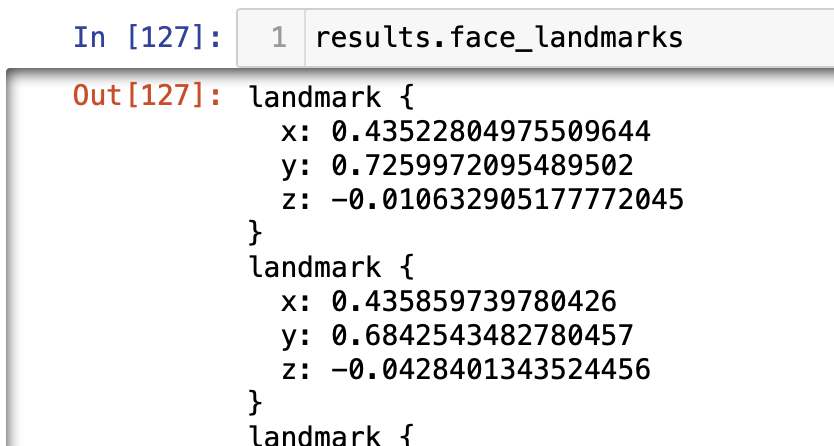
</div>
* We will concatenate the landmarks into a numpy array.
* If there are no landmarks then we will return a numpy 0 array.

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    landmark_data = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(landmark_data)

In [14]:
# rewrite above code onto one line:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])


In [15]:
len(pose) # should be 33 since there are 33 mp pose landmarks

33

In [16]:
pose[:5]

array([[ 0.37800407,  0.57556623, -0.44560382,  0.9999935 ],
       [ 0.39153656,  0.50681192, -0.44786158,  0.99998665],
       [ 0.40686032,  0.50028646, -0.44737968,  0.99998963],
       [ 0.42259368,  0.49403387, -0.44704944,  0.99998742],
       [ 0.35792056,  0.52098572, -0.41419256,  0.99998188]])

In [17]:
pose.shape

(33, 4)

In [18]:
pose.flatten()

array([ 3.78004074e-01,  5.75566232e-01, -4.45603818e-01,  9.99993503e-01,
        3.91536564e-01,  5.06811917e-01, -4.47861582e-01,  9.99986649e-01,
        4.06860322e-01,  5.00286460e-01, -4.47379678e-01,  9.99989629e-01,
        4.22593683e-01,  4.94033873e-01, -4.47049439e-01,  9.99987423e-01,
        3.57920557e-01,  5.20985723e-01, -4.14192557e-01,  9.99981880e-01,
        3.46359104e-01,  5.25513887e-01, -4.13397759e-01,  9.99976277e-01,
        3.34291011e-01,  5.31520963e-01, -4.13563222e-01,  9.99962807e-01,
        4.51256573e-01,  4.97429520e-01, -3.19833457e-01,  9.99993265e-01,
        3.29389304e-01,  5.47219157e-01, -1.41590595e-01,  9.99986649e-01,
        4.08574879e-01,  6.26013577e-01, -3.86510640e-01,  9.99990106e-01,
        3.65050375e-01,  6.41328752e-01, -3.40449423e-01,  9.99985635e-01,
        5.81486166e-01,  7.55706906e-01, -2.06675932e-01,  9.99887586e-01,
        2.77740836e-01,  8.20823371e-01, -4.06514993e-03,  9.99456882e-01,
        7.34363317e-01,  

In [20]:
pose.flatten().shape

(132,)

In [21]:
# save the number of mp landmarks for:
# facemesh, pose, left hand, right hand
# numbers found in MP documentation
num_mp_lmks = {
    'face' : {'num' : 468, 'dim' : 3}, # dim: x,y,z
    'pose' : {'num' : 33, 'dim' : 4}, # dim: x,y,z,visibility
    'hand' : {'num' : 21, 'dim' : 3} # dim: x,y,z
}
# add total by multiplying number of landmarks w/ their dimensions
for v in num_mp_lmks.values():
    v['total'] = (v['num'] * v['dim'])

In [22]:
num_mp_lmks

{'face': {'num': 468, 'dim': 3, 'total': 1404},
 'pose': {'num': 33, 'dim': 4, 'total': 132},
 'hand': {'num': 21, 'dim': 3, 'total': 63}}

In [23]:
len(np.zeros(num_mp_lmks['pose']['total']))

132

In [24]:
pose = np.array([[res.x, res.y, res.z, res.visibility]\
        for res in results.pose_landmarks.landmark]).flatten()\
        if results.pose_landmarks\
        else np.zeros(num_mp_lmks['pose']['total'])

face = np.array([[res.x, res.y, res.z]\
        for res in results.face_landmarks.landmark]).flatten()\
        if results.face_landmarks\
        else np.zeros(num_mp_lmks['face']['total'])

lhand = np.array([[res.x, res.y, res.z]\
        for res in results.pose_landmarks.landmark]).flatten()\
        if results.left_hand_landmarks\
        else np.zeros(num_mp_lmks['hand']['total'])

rhand = np.array([[res.x, res.y, res.z]\
        for res in results.pose_landmarks.landmark]).flatten()\
        if results.right_hand_landmarks\
        else np.zeros(num_mp_lmks['hand']['total'])


In [25]:
len(pose)

132

In [26]:
len(face)

1404

In [27]:
len(lhand)

99

In [28]:
len(rhand)

63

In [29]:
# extract_keypoints(results)
# returns a single array with every single keypoint value in a frame
#results are the media pipe detection results

def extract_keypoints(results):
    if results.pose_landmarks:
        pose = np.array([[res.x, res.y, res.z, res.visibility]\
            for res in results.pose_landmarks.landmark]).flatten()
    else:
        pose = np.zeros(num_mp_lmks['pose']['total'])
    
    if results.face_landmarks:
        face = np.array([[res.x, res.y, res.z]\
            for res in results.face_landmarks.landmark]).flatten()
    else:
        face = np.zeros(num_mp_lmks['face']['total'])

    if results.left_hand_landmarks:
        lhand = np.array([[res.x, res.y, res.z]\
            for res in results.left_hand_landmarks.landmark]).flatten()
    else:
        lhand = np.zeros(num_mp_lmks['hand']['total'])

    if results.right_hand_landmarks:
        rhand = np.array([[res.x, res.y, res.z]\
            for res in results.right_hand_landmarks.landmark]).flatten()
    else:
        rhand = np.zeros(num_mp_lmks['hand']['total'])

    return np.concatenate([pose, face, lhand, rhand])

In [30]:
extract_keypoints(results)[:10]

array([ 0.37800407,  0.57556623, -0.44560382,  0.9999935 ,  0.39153656,
        0.50681192, -0.44786158,  0.99998665,  0.40686032,  0.50028646])

## 4. Set up folders for collection

In [45]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('ASL', 'MP_Data')

# actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# 25 videos worth of data per action
# num_sequences = 25
num_sequences = 25

#videos will be 30 frames in length
sequence_length = 30

In [ ]:
# create folders
# 1 folder per action
# 1 folder per sequence
# 30 frames worth od data will be in each sequence folder

for action in actions:
    for sequence in range(num_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Collect keypoint values for training and testing

In [32]:
# my test array
result_test = extract_keypoints(results)
result_test

array([ 0.37800407,  0.57556623, -0.44560382, ...,  0.        ,
        0.        ,  0.        ])

In [33]:
# save this test array to disk
np.save('test_results', result_test)

In [34]:
# load the test array
np.load('test_results.npy')

array([ 0.37800407,  0.57556623, -0.44560382, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
cap = cv2.VideoCapture(2) # 2 is for logitech (near right USB-C port)
# set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    # loop through actions
    for action in actions:
        # loop through sequences (aka videos)
        for sequence in range(num_sequences):
            # loop through video length (aka sequence length)
            for frame_num in range(sequence_length):
                
                #read feed
                ret, frame = cap.read()
                
                #make detection
                image, results = mediapipe_detection(frame, holistic)
                
                #draw landmarks and connections
                draw_landmarks(image, results)
                
                #collection pauses and messaging
                if frame_num == 0:
                    cv2.putText(frame, ('STARTING {} IN 2 SECONDS!'.format(action)),
                                (120,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,150,0), 2, cv2.LINE_AA)
                    cv2.putText(frame, ('Collecting frames for {} Video Number {}'.format(action, sequence)),
                                (30,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,150), 1, cv2.LINE_AA)
                    # show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(frame, ('Collecting frames for {} Video Number {}'.format(action, sequence)),
                                (30,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,150), 1, cv2.LINE_AA)
                    # show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                #export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                #break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                # end video capture
    cap.release()
    cv2.waitKey(1)
    # close the video capture window(s)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
cap.release()
cv2.waitKey(1)
# close the video capture window(s)
cv2.destroyAllWindows()
cv2.waitKey(1)

## 6. Pre-process data and create labels and features

__sequences__ (__videos__) are going to represent our __feature data__ (aka __x-data__)
__labels__ (is the video hello, thanks or iloveyou) represents our __y-data__

We are going to use our features (sequences or videos) to __train__ a model to represent the __relationship__ between the __features__ and the __labels__.

In [35]:
# import dependencies
from sklearn.model_selection import train_test_split
#helps us split up data for testing and training

from tensorflow.keras.utils import to_categorical
# to convert an np array of values to np array of 0s, 1s

In [37]:
print(actions)

['hello' 'thanks' 'iloveyou']


In [38]:
label_map = {label : num for num, label in enumerate(actions)}

In [39]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [71]:
# bring in the saved data
sequences, labels = [],[] #empty arrays. Think of sequences as x-data, label as y-data
for action in actions:
    for seq in range(num_sequences):
        window = [] # all of the frames for this sequence
        for frame_num in range(sequence_length):
            result = np.load(os.path.join(DATA_PATH, action, str(seq), '{}.npy'.format(frame_num)))
            window.append(result)
        sequences.append(window)
        labels.append(label_map[action])

In [88]:
np.shape(sequences)

(75, 30, 1662)

In [98]:
np.shape(labels)

(75,)

In [103]:
x = np.array(sequences) # make a numpy array from sequences

In [100]:
sequences

[[array([ 0.44138631,  0.60108995, -1.12835491, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.44121972,  0.52195168, -0.57821298, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.44093838,  0.4919728 , -0.50499684, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.4408533 ,  0.48721889, -0.52490783, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.4394891 ,  0.48536903, -0.50781649, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.43747428,  0.49241713, -0.50817031, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.43619412,  0.49606898, -0.519467  , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.43522874,  0.4991186 , -0.49879789, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.43492386,  0.50103813, -0.45575058, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.43503794,  0.50287718, -0.42033774, ...,  0.        ,
       

In [104]:
x

array([[[ 0.44138631,  0.60108995, -1.12835491, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.44121972,  0.52195168, -0.57821298, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.44093838,  0.4919728 , -0.50499684, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.43103504,  0.47624123, -0.58562988, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.43131414,  0.4774996 , -0.5392434 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.43232313,  0.47838548, -0.53834665, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.43258455,  0.47883555, -0.5378204 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.44358197,  0.47776169, -0.55569804, ...,  0.12964603,
          0.52221841, -0.01776789],
        [ 0.44657746,  0.47583082, -0.55405372, ...,  0.15771393,
          0.46360639,  0.00965701],
        ...,
        [ 0.49519533,  0.48109221, -0.55869883, ...,  

In [105]:
np.shape(x)

(75, 30, 1662)

In [106]:
labels # it's a vector with values either 0, 1, or 2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [108]:
np.shape(labels)

(75,)

In [114]:
# change (75,) label vector w values of 0,1,2 to (3,) category vector
# where 1 is either in cell[0], cell[1], or cell[2]
# basically a binary flag
# i.e. label value = 2 --> category value = [0, 0, 1]
y = to_categorical(labels).astype(int)

In [115]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [111]:
y[24]

array([1, 0, 0])

In [112]:
y[49]

array([0, 1, 0])

In [113]:
y[74]

array([0, 0, 1])

In [118]:
np.shape(y)

(75, 3)

### split our data into training and testing
__train_test_split()__ will make a __random__ selection each time

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.06) #6% will be test data

In [130]:
y_test

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [127]:
len(x_test)

5

In [128]:
len(y_test)

5

## 7. Build and train LSTM neural network

## 8. Make predictions

## 9. Save weights

## 10. Evaluation using confusion matrix and accuracy